In [1]:
# Libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

# Set directory
os.chdir("/Users/Sam Edds/Desktop/120-years-of-olympic-history-athletes-and-results")

# Read in files
events = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

# Data Exploration 

##### We will explore our data through descriptive statistics, missingness analysis, and outlier analysis to help us determine an interesting topic. 

In [2]:
### Basic Diagnostics
# Look at the data to understand the type and missingness
print(events.info())

# Summarization of variables for only numeric...it looks like someone was 10 years and someone 97. Look at the age extremes
events.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [3]:
### See if missingness is a function of year- older Olympics may be more sparse
# Check from 1950 back...a little under 2/3 of the missing comes from that time for weight and height
pre_1950 = events[events['Year'] < 1951]
print(pre_1950.isnull().sum())

ID            0
Name          0
Sex           0
Age        7444
Height    38134
Weight    40126
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     36945
dtype: int64


In [4]:
### Check age extremes
# Only a handful of people...and the older ones are when painting was an Olympic event
events[(events['Age'] > 90) | (events['Age'] < 12)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
43468,22411,Magdalena Cecilia Colledge,F,11.0,152.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN
73461,37333,Carlos Bienvenido Front Barrera,M,11.0,NaN,NaN,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Eights,NaN
79024,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
94058,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
101378,51268,Beatrice Hutiu,F,11.0,151.0,38.0,Romania,ROU,1968 Winter,1968,Winter,Grenoble,Figure Skating,Figure Skating Women's Singles,NaN
102916,52070,Etsuko Inada,F,11.0,NaN,NaN,Japan,JPN,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Figure Skating,Figure Skating Women's Singles,NaN
140650,70616,Liu Luyang,F,11.0,NaN,NaN,China,CHN,1988 Winter,1988,Winter,Calgary,Figure Skating,Figure Skating Mixed Ice Dancing,NaN
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
152798,76675,Marcelle Matthews,F,11.0,NaN,NaN,South Africa,RSA,1960 Winter,1960,Winter,Squaw Valley,Figure Skating,Figure Skating Mixed Pairs,NaN


In [5]:
### Look at how many teams have been in the Olympics and counts for each...it looks like many are one-offs or rarely attend
# Deduplicate so each game for each team only has one unique row
team = events.drop_duplicates(subset = ['Team', 'Games'], keep = 'first')
team = team.groupby('Team')['Games'].agg(['count']).reset_index().sort_values(['count'])
team.describe()

,count
count,1184.000000
mean,4.852196
std,8.731030
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,51.000000


In [6]:
### Look at the total number of events and athletes
# Total Events
print(len(events.Event.unique()), "Events")
# Total Athletes
print(len(events.Name.unique()), "Athletes")

765 Events
134732 Athletes


In [7]:
### Look at regions
print(regions.info())

# Look at missingness
print(regions[regions.region.isna()])

# If region is missing make region = notes
regions['region'] = np.where(regions.region.isna(), regions['notes'], regions['region'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB
None
     NOC region                 notes
168  ROT    NaN  Refugee Olympic Team
208  TUV    NaN                Tuvalu
213  UNK    NaN               Unknown


In [8]:
#### Merge events and regions dataframes, keeping all events data
olympics = pd.merge(events, regions, how = 'outer', on = 'NOC')

# Make a copy
outcomes = olympics.copy()

# Can prior medal outcomes predict future medal outcomes?

##### We will test whether future medal outcomes (yes / no) can be predicted by prior medal outcomes by country and event. We will use the latest summer Olympics as out out-of-sample prediction, and train on data for the last 4 Summer Olympics. This means a country will need to have participated in the last 5 Summer Olympics. We will start with logistic regression, and random forests.

In [9]:
### Subset data for the last 5 summer Olympics and only keep obs with all years
# Last 5 Olympics
olympics = olympics[(olympics['Year'] > (2016 - 20)) & (olympics['Season'] == 'Summer')]

# Only keep data if event / team has appeared in all of them
five_plus = olympics.drop_duplicates(subset = ['Team', 'Games', 'Event'], keep = 'first')

# Count number of years by event
five_plus = five_plus.groupby(['Team', 'Event'], as_index = False).agg({'count'}).reset_index()

# Flatten
five_plus.columns = ["_".join(x) for x in five_plus.columns.ravel()]

# Look at sample size when only last 5 are kept 
five_plus = five_plus[five_plus['ID_count'] == 5].rename(columns={"Team_": "Team",
                                                             "Event_": "Event"})
# Sample size
print(len(five_plus), "Sample Size")

# Subset data to just summer teams / events with all 5 most recent Summer Olympics data
summer = pd.merge(olympics, five_plus[['Team', 'Event']], how = 'inner', on = ['Team', 'Event'])

2024 Sample Size


In [10]:
# How many events and teams are there total?
print(len(summer.Event.unique()), "Events")
print(len(summer.Team.unique()), "Teams")

# Check missingness...some height and weight...more weight than height
print(summer.isnull().sum())


259 Events
119 Teams
ID            0
Name          0
Sex           0
Age           0
Height       84
Weight      183
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     19195
region       17
notes     24450
dtype: int64


In [11]:
# Look at missing height / weight data - see if always both missing
miss_h = summer[summer.Height.isna()]
miss_w = summer[summer.Weight.isna()]

# Look if miss_h is contained within miss_w...almost the same so use miss_w to check missingness numbers
print(len(pd.merge(miss_w, miss_h, how = 'outer', on = ['Name', 'Year', 'Event'])), "Weight and Height missingness")

# Look at the number of teams / events / years percentage...about 1/3 and spread across years...we are ok moving forward
# And will look at this further when aggrgegated
print(len(miss_w.Team.unique()) / len(summer.Team.unique()), "Missing Teams")
print(len(miss_w.Event.unique()) / len(summer.Event.unique()), "Missing Events")
print(len(miss_w.Year.unique()) / len(summer.Year.unique()), "Missing Year")

190 Weight and Height missingness
0.33613445378151263 Missing Teams
0.3127413127413127 Missing Events
1.0 Missing Year


# Aggregate Data to the Team x Event level

In [12]:
### Data set-up: Aggregate numeric data to the team x event level
summer_games = summer.copy()

# Make Team and Event categorical
summer_games['Team'] = summer_games.Team.astype('category')
summer_games['Event'] = summer_games.Event.astype('category')

# Make Year string
summer_games['Year'] = summer_games['Year'].astype(int).apply(str)

# Count athletes
summer_games['athletes'] = 1
# Aggregate up Age, Height, Weight data and count Athletes and Medals
summer_agg = summer_games.groupby(['Team', 'Year', 'Event'], as_index=False).agg({'athletes':['count'],
                                                                'Age':['mean', 'median', 'max'],
                                                                'Height':['mean', 'median', 'max'],
                                                                'Weight':['mean', 'median', 'max'],
                                                                'Medal':['count']})
# Flatten
summer_agg.columns = ["_".join(x) for x in summer_agg.columns.ravel()]

In [13]:
### Look at missinginess now
print(summer_agg.isnull().sum())
# All events have one athlete and height was not recorded and generally weight was not as well.
# Wait until data are wide to remove...easier to compare sample size
summer_agg[summer_agg.Height_median.isna()]

Team_              0
Year_              0
Event_             0
athletes_count     0
Age_mean           0
Age_median         0
Age_max            0
Height_mean       22
Height_median     22
Height_max        22
Weight_mean       47
Weight_median     47
Weight_max        47
Medal_count        0
dtype: int64


,Team_,Year_,Event_,athletes_count,Age_mean,Age_median,Age_max,Height_mean,Height_median,Height_max,Weight_mean,Weight_median,Weight_max,Medal_count
37,American Samoa,2008,Athletics Men's 100 metres,1,19.0,19.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,0
812,Bahamas,2012,Athletics Women's Long Jump,1,24.0,24.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,0
819,Bahamas,2016,Athletics Women's Long Jump,1,28.0,28.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,0
820,Bahrain,2000,Swimming Women's 50 metres Freestyle,1,14.0,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0
849,Belarus,2000,Swimming Men's 100 metres Freestyle,1,26.0,26.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2495,Cuba,2012,Boxing Men's Heavyweight,1,22.0,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2504,Cuba,2012,Judo Women's Half-Middleweight,1,28.0,28.0,28.0,NaN,NaN,NaN,62.0,62.0,62.0,0
2511,Cuba,2012,"Wrestling Men's Light-Heavyweight, Freestyle",1,22.0,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4868,Hungary,2012,Swimming Women's 200 metres Backstroke,1,19.0,19.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4943,India,2000,Boxing Men's Bantamweight,1,21.0,21.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [14]:
### Add additional variables and reshape

# Add prediction variable: binary y/n for medal outcome, must be categorical
summer_agg['Medaled'] = np.where(summer_agg['Medal_count'] == 0, 0, 1)
summer_agg['Medaled'] = summer_agg.Medaled.astype('category')

# Reshape to wide
summer_agg = summer_agg.set_index(['Team_', 'Event_', 'Year_']).unstack(2).reset_index()
summer_agg.columns = ["_".join(x) for x in summer_agg.columns.ravel()]


# Remove missing data and compare sample size impact
print(len(summer_agg), "Sample with Missing")
summer_agg = summer_agg.dropna()
print(len(summer_agg), "New Sample")

2024 Sample with Missing
1980 New Sample


In [15]:
### String Variable cleaning and adding 
# Only need one obs per Team Year Event
char_vars = summer.drop_duplicates(subset = ['Team', 'Event'], keep = 'first').reset_index()

# Keep additional string variables desired
char_vars = char_vars[['Team', 'Event', 'Sex', 'NOC', 'region', 'Sport']]
# Check missingness
print(char_vars.isnull().sum())
print(char_vars[char_vars.region.isna()])

# Look into this...it looks like NOC was entered incorrectly for these events. Adjust NOC and region
regions[regions['region'] == 'Singapore']

# Fix
char_vars.iloc[1321, char_vars.columns.get_loc('region')] = 'Singapore'
char_vars.iloc[1322, char_vars.columns.get_loc('region')] = 'Singapore'
char_vars.iloc[1321, char_vars.columns.get_loc('NOC')] = 'SIN'
char_vars.iloc[1322, char_vars.columns.get_loc('NOC')] = 'SIN'

Team      0
Event     0
Sex       0
NOC       0
region    2
Sport     0
dtype: int64
           Team                                  Event Sex  NOC region  \
1321  Singapore           Table Tennis Women's Singles   F  SGP    NaN   
1322  Singapore  Swimming Women's 100 metres Butterfly   F  SGP    NaN   

             Sport  
1321  Table Tennis  
1322      Swimming  


In [16]:
# Transform into categorical
char_vars = char_vars.astype('category')

# Rename in summer_agg
summer_agg = summer_agg.rename(columns = {'Team__': 'Team',
                            'Event__': 'Event'})
# Combine
summ_num = pd.merge(summer_agg, char_vars, how = 'inner', on = ['Team', 'Event'])
# Double check we still have 1,980 obs
print(len(summ_num))

1980


In [17]:
# Sklearn needs these to be categorical numerics, use label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

transf = char_vars.columns

for col in transf:
    le.fit(summ_num[col])
    summ_num[col] = le.transform(summ_num[col])

# Logistic Regression Analysis

In [18]:
# Create holdout for 2016. Stratify so every team has half of their 2016 data held out.
hold_out = summ_num.groupby('Team', group_keys=False).apply(lambda x: x.sample(frac=0.5))

# Separate outcome variables
hold_out_y = hold_out['Medaled_2016']

# Remove 2016 variables
hold_out = hold_out[[x for x in hold_out.columns if x[-5:] != '_2016' and x[:7] != 'Medal_']]

# Train / Test on 80% of remaining data...sklearn has built in CV so it can be lumped as one
train_test = summ_num.loc[~summ_num.index.isin(hold_out.index), :].reset_index(drop = True)

# Separate out outcome
train_test_y = train_test['Medaled_2016']

# Remove 2016 variables
train_test = train_test[[x for x in train_test.columns if x[-5:] != '_2016' and x[:7] != 'Medal_']]

In [19]:
# Logistic Regression-- Remove intercept because otherwise the reference categories will be very small and specific
from sklearn.linear_model import LogisticRegressionCV

# Cross-validates with k = 5 folds for cross validation...score is averaged over all of the runs
log_reg = LogisticRegressionCV(solver = 'liblinear', fit_intercept = False, cv = 5, random_state = 99).fit(train_test, train_test_y)
pred = log_reg.predict(train_test)

In [20]:
# Look at accuracy, precision, and recall...results aren't great
print(metrics.accuracy_score(train_test_y, pred))
print(metrics.classification_report(train_test_y, pred)) 


0.7684630738522954
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       767
           1       1.00      0.01      0.03       235

   micro avg       0.77      0.77      0.77      1002
   macro avg       0.88      0.51      0.45      1002
weighted avg       0.82      0.77      0.67      1002



Text(0.5, 1.0, 'Logistic Regression \nAccuracy Score: 0.768')

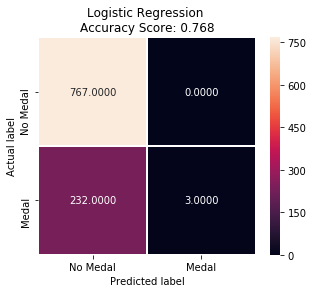

In [21]:
# Create a confusion matrix for more detail. It looks like we underestimate the number of teams / events with medals
confm = metrics.confusion_matrix(train_test_y, pred)
confm_df = pd.DataFrame(confm, index = ['No Medal', 'Medal'],
                               columns = ['No Medal', 'Medal'])
plt.figure(figsize=(5,4))
sns.heatmap(confm_df, annot=True, fmt=".4f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Logistic Regression \nAccuracy Score: {0:.3f}'.format(metrics.accuracy_score(train_test_y, pred))
plt.title(title, size = 12)

In [22]:
# Predict now on the hold-out and see how we do...about the same.
pred_hold = log_reg.predict(hold_out)

print(metrics.accuracy_score(hold_out_y, pred_hold))
print(metrics.classification_report(hold_out_y, pred_hold)) 


0.7699386503067485
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       751
           1       0.60      0.03      0.05       227

   micro avg       0.77      0.77      0.77       978
   macro avg       0.69      0.51      0.46       978
weighted avg       0.73      0.77      0.68       978



Text(0.5, 1.0, 'Logistic Regression \nAccuracy Score: 0.770')

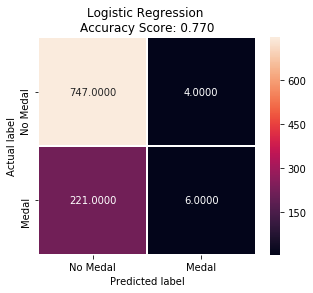

In [23]:
# Confusion matrix on hold out
confm_hold = metrics.confusion_matrix(hold_out_y, pred_hold)

confm_hold_df = pd.DataFrame(confm_hold, index = ['No Medal', 'Medal'],
                               columns = ['No Medal', 'Medal'])
plt.figure(figsize=(5,4))
sns.heatmap(confm_hold_df, annot=True, fmt=".4f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Logistic Regression \nAccuracy Score: {0:.3f}'.format(metrics.accuracy_score(hold_out_y, pred_hold))
plt.title(title, size = 12)

# Gradient Boosting Method

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# Set learning rate options
learning_rate = [0.025, 0.05, 0.075]
# List to append results to
cv_list = list()

# Split data into 80/20 and try different learning rates
for i in range(5):
    # For train randomly sample 80%
    train_sub = train_test.sample(frac = .8)
    # For test take the rest
    test_sub = train_test.drop(train_sub.index)
    test_y_sub = train_test_y.drop(train_sub.index)
    train_y_sub = train_test_y.drop(test_sub.index)    

    # For each rate train and test the model, appending the score to a list
    for rate in learning_rate:
        rf = GradientBoostingClassifier(learning_rate = rate, max_depth = 10, random_state = 99).fit(train_sub, train_y_sub)
        # Predict
        pred_rf = rf.predict(test_sub)
        score_tup = tuple((metrics.accuracy_score(test_y_sub, pred_rf), rate))
        cv_list.append(score_tup)
# Show the full list
print(cv_list)

# Sort and print top 5
cv_list.sort(key=lambda x: x[0], reverse=True)
print('\n'.join('{}: {}'.format(*k) for k in enumerate(cv_list[:5])))


[(0.75, 0.025), (0.755, 0.05), (0.745, 0.075), (0.735, 0.025), (0.75, 0.05), (0.745, 0.075), (0.725, 0.025), (0.725, 0.05), (0.72, 0.075), (0.76, 0.025), (0.73, 0.05), (0.72, 0.075), (0.755, 0.025), (0.72, 0.05), (0.73, 0.075)]
0: (0.76, 0.025)
1: (0.755, 0.05)
2: (0.755, 0.025)
3: (0.75, 0.025)
4: (0.75, 0.05)


In [25]:
# .075 had the best results on average
# Use this for out-of-sample prediction
rf_fin = GradientBoostingClassifier(learning_rate = .075, max_depth = 10, random_state = 99).fit(train_test, train_test_y)
rf_pred_hold = rf_fin.predict(hold_out)

print(metrics.accuracy_score(hold_out_y, rf_pred_hold))

0.7914110429447853


In [26]:
# Look at most importance features...put into df so I can figure out which variables
importances = rf_fin.feature_importances_
impt_df = pd.DataFrame(importances)
impt_df.sort_values(0, ascending = False).head()

,0
45,0.092449
49,0.067336
14,0.038316
19,0.036159
0,0.035002


In [27]:
# Check what variables the top 3 are
print(train_test.columns[49], "Top", train_test.columns[45], "Second",
     train_test.columns[1], "Third")

Medaled_2012 Top Medal_count_2012 Second Event Third


Text(0.5, 1.0, 'Gradient Boosting Methods \nAccuracy Score: 0.791')

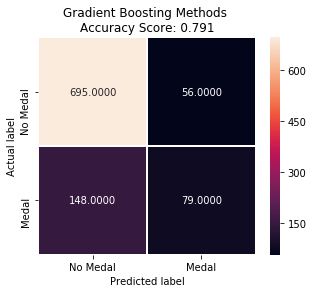

In [28]:
# Confusion matrix on hold out for GBM
rf_confm_hold = metrics.confusion_matrix(hold_out_y, rf_pred_hold)

rf_confm_hold_df = pd.DataFrame(rf_confm_hold, index = ['No Medal', 'Medal'],
                               columns = ['No Medal', 'Medal'])
plt.figure(figsize=(5,4))
sns.heatmap(rf_confm_hold_df, annot=True, fmt=".4f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Gradient Boosting Methods \nAccuracy Score: {0:.3f}'.format(metrics.accuracy_score(hold_out_y, rf_pred_hold))
plt.title(title, size = 12)

In [29]:
# Examine events correctly predicted
hold_out['pred'] = rf_pred_hold
hold_out['Medaled_2016'] = hold_out_y

In [30]:
# Examine number of teams and events
final = hold_out[(hold_out['pred'] == 1) & (hold_out['Medaled_2016'] == 1)]
print(len(final.Event.unique()), "Events")
print(len(final.Team.unique()), "Teams")
print(len(final.Sport.unique()), "Sport")

final.groupby('Team')['Team'].value_counts()


69 Events
21 Teams
22 Sport


Team  Team
4     4        3
14    14       1
18    18       1
20    20       9
27    27       1
28    28       2
37    37       1
40    40       2
43    43       6
46    46       6
53    53       2
57    57       1
60    60       1
61    61       2
62    62       4
64    64       4
88    88       5
92    92       1
95    95       2
108   108     24
111   111      1
Name: Team, dtype: int64

In [31]:
# Compare to the total hold out numbers
print(len(hold_out.Event.unique()), "Events")
print(len(hold_out.Team.unique()), "Teams")
print(len(hold_out.Sport.unique()), "Sport")

240 Events
85 Teams
32 Sport
